# The evidence approximation

This repository contains the code for the evidence approximation, as seen in the Pattern Recognition and Machine Learning book.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import X, t

## Import the dataset

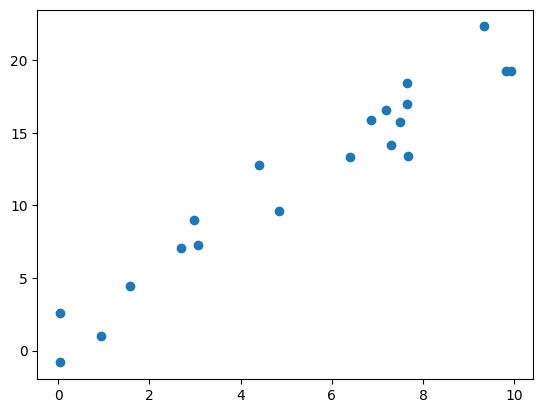

In [2]:
# Plot the dataset
plt.scatter(X, t)
plt.show()

In [3]:
# Create an augmented train features
X_augmented = np.hstack((np.ones_like(X).reshape(-1, 1), X.reshape(-1, 1)))

## The evidence approximation

In [7]:
def find_parameters(X, t, threshold=0.001):
    """
    Find approximate parameters, namely alpha, beta and w of Bayesian Linear Regression with the evidence approximation
    :param X: augmented train features
    :param t: augmented train labels
    :param threshold: the threshold to refine the values of alpha and beta
    :return: alpha, beta, m_N, S_N
    """
    # Get the dimensions
    N, M = X.shape
    
    # Firstly, we find appropriate values for alpha and beta by the evidence approximation
    # Initialise alpha and beta
    alpha = 1
    beta = 1
    
    # Find the matrix Phi.T Phi
    phi_matrix = X.T @ X
    
    # Find the eigenvalues of phi matrix
    eigenvalues, _ = np.linalg.eig(phi_matrix)
    
    # Refine alpha and beta
    alpha_dist = beta_dist = float('inf')
    while alpha_dist >= threshold or beta_dist >= threshold:
        # Calculate A matrix
        a_matrix = alpha * np.eye(M) + beta * phi_matrix
        
        # Calculate gamma
        gamma = np.sum(eigenvalues / (eigenvalues + alpha))
        
        # Calculate m_n
        m_n = beta * np.linalg.solve(a_matrix, X.T @ t)
        
        # Refine alpha and beta
        alpha_new = gamma / np.dot(m_n, m_n)
        beta_new = (N - gamma) / np.dot(t - X @ m_n, t - X @ m_n)
        
        # Calculate the difference
        alpha_dist = np.abs(alpha_new - alpha)
        beta_dist = np.abs(beta_new - beta)
        
        # Update alpha and beta
        alpha = alpha_new
        beta = beta_new
        
    # Calculate m_n and s_n
    covariance = np.linalg.inv(alpha * np.eye(X.shape[1]) + beta * X.T @ X)
    mean = beta * np.dot(covariance @ X.T, t)
    
    return alpha, beta, covariance, mean


def predict(X_new, covariance, mean, beta=0.5):
    """
    Find the mean and variance of the new label t_new
    :param X_new: the new datapoints
    :param covariance: posterior covariance of w
    :param mean: posterior mean of w
    :param beta: precision of t|w
    :return: the mean and variance of the prediction
    """
    means = []
    variances = []
    
    for x_new in X_new:
        mean_t = np.dot(mean, x_new)
        variance_t = 1/beta + np.dot(x_new, np.dot(covariance, x_new))
        means.append(mean_t)
        variances.append(variance_t)
        
    return means, variances

## Generate predictions

In [8]:
# Generate prediction
alpha, beta, covariance_w, mean_w = find_parameters(X_augmented, t)
means, variances = predict(X_augmented, covariance_w, mean_w)

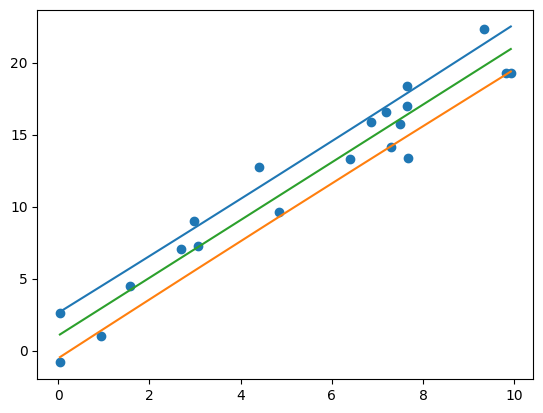

In [9]:
# Calculate the confidence interval of prediction
upper_bound = means + np.sqrt(variances)
lower_bound = means - np.sqrt(variances)

# Plot the prediction
plt.scatter(X, t)
plt.plot(X, upper_bound)
plt.plot(X, lower_bound)
plt.plot(X, means)
plt.show()